In [29]:
#importando as bibliotecas e utilizando modelo pré-treinado

import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [ ]:
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

img_size = (160, 160)
batch_size = 32

train_dataset =  tf.keras.utils.image_dataset_from_directory(train_dir,
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size)

validation_dataset =  tf.keras.utils.image_dataset_from_directory(validation_dir,
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size)


In [ ]:
base_model = MobileNetV2(input_shape=(img_size[0], img_size[1], 3),
                         include_top=False,
                         weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)

In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset,
          epochs=2,
          validation_data=validation_dataset)

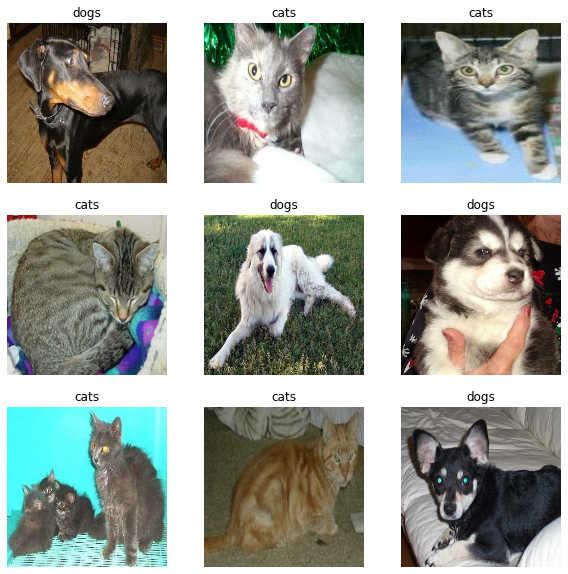

In [31]:
#Mostrando as imagens

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")